# RAG Chatbot - Exploratory Data Analysis (EDA)

## วัตถุประสงค์:
- วิเคราะห์โครงสร้างและเนื้อหาของ doc
- ศึกษาชุดคำถามทั้ง 3 ประเภท
- สรุป insights สำหรับการออกแบบ RAG system

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# ตั้งค่า style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. โหลดข้อมูล

In [3]:
# โหลด documents
# หมายเหตุ: ปรับ path ให้ตรงกับที่เก็บไฟล์ของคุณ
documents_df = pd.read_csv('../data/documents.csv')
# โหลดชุดคำถามทั้ง 3 ประเภท
single_passage_df = pd.read_csv('../data/single_passage_answer_questions.csv')
multi_passage_df = pd.read_csv('../data/multi_passage_answer_questions.csv')
no_answer_df = pd.read_csv('../data/no_answer_questions.csv')

print("✅ ข้อมูลโหลดสำเร็จ!")
print(f"\n📄 จำนวนเอกสาร: {len(documents_df)}")
print(f"❓ Single-passage questions: {len(single_passage_df)}")
print(f"❓ Multi-passage questions: {len(multi_passage_df)}")
print(f"❓ No-answer questions: {len(no_answer_df)}")

FileNotFoundError: [Errno 2] No such file or directory: '../data/documents.csv'

## 2. วิเคราะห์เอกสาร (Documents)

In [ ]:
# ดูโครงสร้างข้อมูล
print("📋 โครงสร้างของ documents.csv:")
print(documents_df.info())
print("\n" + "="*50)
print("\n🔍 ตัวอย่างข้อมูล 3 แถวแรก:")
documents_df.head(3)

📋 โครงสร้างของ documents.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       20 non-null     int64 
 1   source_url  20 non-null     object
 2   text        20 non-null     object
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes
None


🔍 ตัวอย่างข้อมูล 3 แถวแรก:


,index,source_url,text
0,0,https://enterthegungeon.fandom.com/wiki/Bullet...,Bullet Kin\nBullet Kin are one of the most com...
1,1,https://www.dropbox.com/scl/fi/ljtdg6eaucrbf1a...,---The Paths through the Underground/Underdark...
2,2,https://bytes-and-nibbles.web.app/bytes/stici-...,Semantic and Textual Inference Chatbot Interfa...


In [ ]:
# วิเคราะห์ความยาวของเอกสาร
# สมมติว่าเอกสารอยู่ในคอลัมน์ชื่อ 'text' หรือ 'content'
# ปรับให้ตรงกับชื่อคอลัมน์จริงของคุณ

# ลองหาชื่อคอลัมน์ที่น่าจะเป็นเนื้อหาเอกสาร
print("📝 คอลัมน์ทั้งหมดใน documents.csv:")
print(documents_df.columns.tolist())

# ตั้งชื่อคอลัมน์ที่เก็บเนื้อหาเอกสาร
text_column = 'text'  # ⚠️ ปรับให้ตรงกับชื่อคอลัมน์จริง

if text_column in documents_df.columns:
    # คำนวณความยาวเอกสาร (จำนวนตัวอักษร)
    documents_df['char_length'] = documents_df[text_column].str.len()
    
    # คำนวณจำนวนคำ
    documents_df['word_count'] = documents_df[text_column].str.split().str.len()
    
    print("\n📊 สถิติความยาวเอกสาร:")
    print(documents_df[['char_length', 'word_count']].describe())
else:
    print(f"\n⚠️ ไม่พบคอลัมน์ '{text_column}' - กรุณาตรวจสอบชื่อคอลัมน์")

📝 คอลัมน์ทั้งหมดใน documents.csv:
['index', 'source_url', 'text']

📊 สถิติความยาวเอกสาร:
         char_length    word_count
count      20.000000     20.000000
mean    35862.300000   5797.100000
std     45832.721225   7427.437894
min      2750.000000    470.000000
25%     13026.500000   2255.000000
50%     20250.500000   3137.500000
75%     39751.250000   6167.750000
max    211782.000000  34764.000000


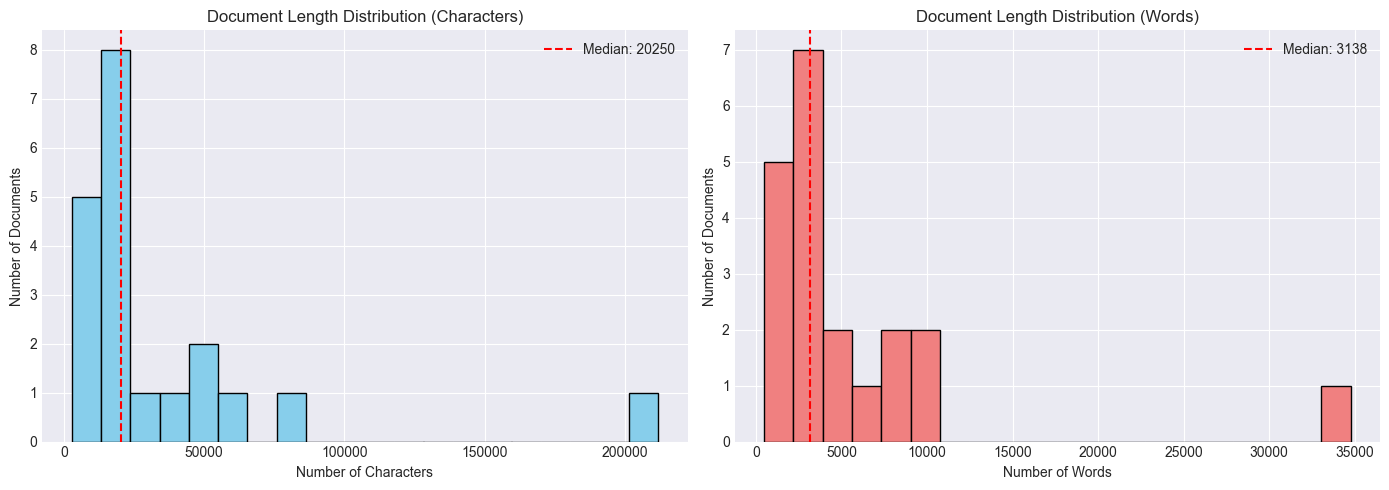


💡 Key Insights:
- Shortest document: 470 words
- Longest document: 34764 words
- Average document: 5797 words


In [ ]:
# Visualization: Document length distribution
if text_column in documents_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Character count distribution
    axes[0].hist(documents_df['char_length'], bins=20, color='skyblue', edgecolor='black')
    axes[0].set_xlabel('Number of Characters')
    axes[0].set_ylabel('Number of Documents')
    axes[0].set_title('Document Length Distribution (Characters)')
    axes[0].axvline(documents_df['char_length'].median(), color='red', 
                    linestyle='--', label=f'Median: {documents_df["char_length"].median():.0f}')
    axes[0].legend()
    
    # Word count distribution
    axes[1].hist(documents_df['word_count'], bins=20, color='lightcoral', edgecolor='black')
    axes[1].set_xlabel('Number of Words')
    axes[1].set_ylabel('Number of Documents')
    axes[1].set_title('Document Length Distribution (Words)')
    axes[1].axvline(documents_df['word_count'].median(), color='red', 
                    linestyle='--', label=f'Median: {documents_df["word_count"].median():.0f}')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 Key Insights:")
    print(f"- Shortest document: {documents_df['word_count'].min():.0f} words")
    print(f"- Longest document: {documents_df['word_count'].max():.0f} words")
    print(f"- Average document: {documents_df['word_count'].mean():.0f} words")

## 3. วิเคราะห์คำถาม (Questions)

In [ ]:
# ดูโครงสร้างของแต่ละชุดคำถาม
print("📋 โครงสร้าง Single-passage Questions:")
print(single_passage_df.info())
print("\nตัวอย่าง:")
display(single_passage_df.head(2))

print("\n" + "="*50)
print("\n📋 โครงสร้าง Multi-passage Questions:")
print(multi_passage_df.info())
print("\nตัวอย่าง:")
display(multi_passage_df.head(2))

print("\n" + "="*50)
print("\n📋 โครงสร้าง No-answer Questions:")
print(no_answer_df.info())
print("\nตัวอย่าง:")
display(no_answer_df.head(2))

📋 โครงสร้าง Single-passage Questions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   document_index  40 non-null     int64 
 1   question        40 non-null     object
 2   answer          40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB
None

ตัวอย่าง:


,document_index,question,answer
0,0,What do keybullet kin drop?,Keybullet kin drop a key upon death.
1,0,What kind of gun does the bandana bullet kin use?,The bandana bullet kin wields a machine pistol.




📋 โครงสร้าง Multi-passage Questions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   document_index  40 non-null     int64 
 1   question        40 non-null     object
 2   answer          40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB
None

ตัวอย่าง:


,document_index,question,answer
0,0,Which enemy types wield an AK-47?,Assault-rifle wielding Bullet and Tankers wiel...
1,0,What makes jammed enemies different?,"Jammed Keybullet Kin drop 2 keys instead of 1,..."




📋 โครงสร้าง No-answer Questions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   document_index  40 non-null     int64 
 1   question        40 non-null     object
dtypes: int64(1), object(1)
memory usage: 768.0+ bytes
None

ตัวอย่าง:


,document_index,question
0,0,How much health does the Mutant Bullet Kin have?
1,0,Where can bishops be found?


In [ ]:

question_column = 'question' 

if question_column in single_passage_df.columns:
    # วิเคราะห์ความยาวคำถาม
    single_passage_df['question_length'] = single_passage_df[question_column].str.split().str.len()
    multi_passage_df['question_length'] = multi_passage_df[question_column].str.split().str.len()
    no_answer_df['question_length'] = no_answer_df[question_column].str.split().str.len()
    
    # สรุปสถิติ
    print("\n📊 ความยาวคำถาม (จำนวนคำ):")
    print("\nSingle-passage:")
    print(single_passage_df['question_length'].describe())
    print("\nMulti-passage:")
    print(multi_passage_df['question_length'].describe())
    print("\nNo-answer:")
    print(no_answer_df['question_length'].describe())


📊 ความยาวคำถาม (จำนวนคำ):

Single-passage:
count    40.000000
mean      8.475000
std       2.745509
min       4.000000
25%       7.000000
50%       8.000000
75%      10.000000
max      17.000000
Name: question_length, dtype: float64

Multi-passage:
count    40.00000
mean      7.92500
std       2.53577
min       4.00000
25%       6.00000
50%       8.00000
75%      10.00000
max      14.00000
Name: question_length, dtype: float64

No-answer:
count    40.000000
mean      7.600000
std       2.296039
min       4.000000
25%       5.750000
50%       8.000000
75%       9.000000
max      13.000000
Name: question_length, dtype: float64


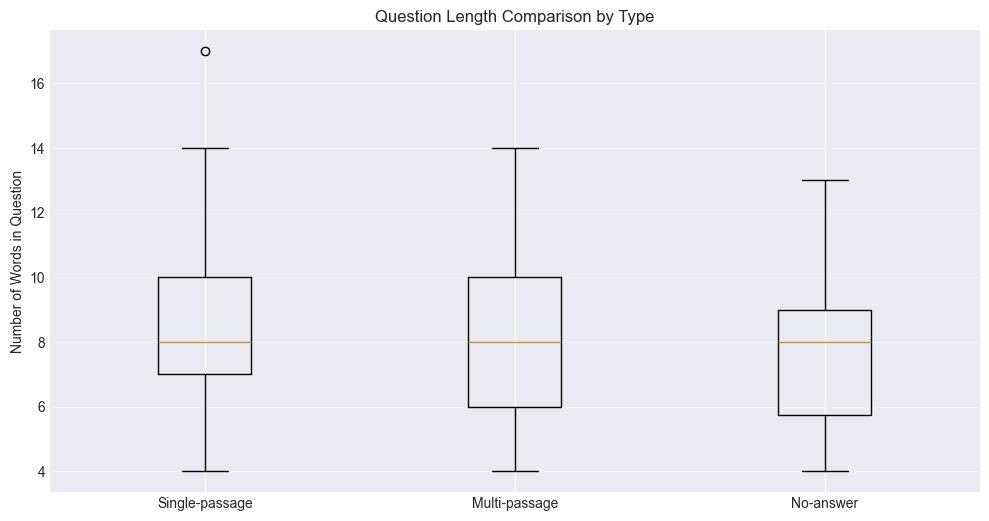

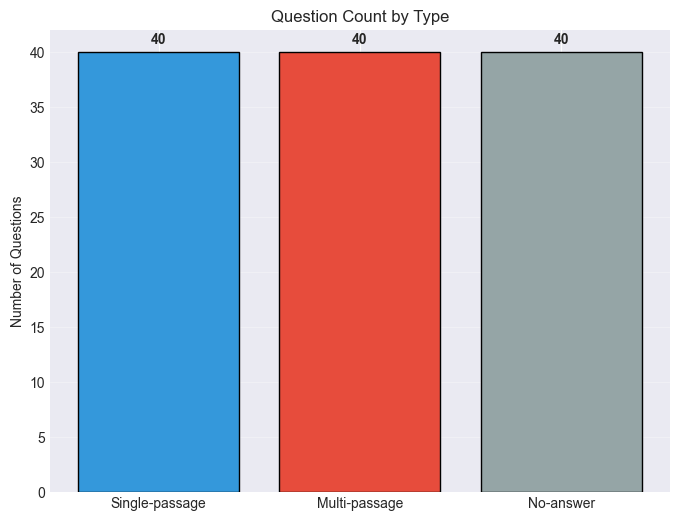

In [ ]:
# Visualization: Compare question lengths by type
if question_column in single_passage_df.columns:
    plt.figure(figsize=(12, 6))
    
    data_to_plot = [
        single_passage_df['question_length'].dropna(),
        multi_passage_df['question_length'].dropna(),
        no_answer_df['question_length'].dropna()
    ]
    
    plt.boxplot(data_to_plot, labels=['Single-passage', 'Multi-passage', 'No-answer'])
    plt.ylabel('Number of Words in Question')
    plt.title('Question Length Comparison by Type')
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # Question count by type
    plt.figure(figsize=(8, 6))
    categories = ['Single-passage', 'Multi-passage', 'No-answer']
    counts = [len(single_passage_df), len(multi_passage_df), len(no_answer_df)]
    colors = ['#3498db', '#e74c3c', '#95a5a6']
    
    plt.bar(categories, counts, color=colors, edgecolor='black')
    plt.ylabel('Number of Questions')
    plt.title('Question Count by Type')
    plt.grid(axis='y', alpha=0.3)
    
    # Add count labels on bars
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.show()

## 4. ตัวอย่างข้อมูล (Sample Data)

In [ ]:
# แสดงตัวอย่างเอกสาร
if text_column in documents_df.columns:
    print("📄 ตัวอย่างเอกสารที่ 1:")
    print("="*50)
    print(documents_df[text_column].iloc[0][:500] + "...")  # แสดง 500 ตัวอักษรแรก
    print("="*50)

📄 ตัวอย่างเอกสารที่ 1:
Bullet Kin
Bullet Kin are one of the most common enemies. They slowly walk towards the player, occasionally firing a single bullet. They can flip tables and use them as cover. They will also deal contact damage if the player touches them.

Occasionally, Bullet Kin will have assault rifles, in which case they will rapidly fire 8 bullets towards the player before reloading. When an assault rifle wielding bullet kin appears, there will often be more in the same room.

On some occasions the player w...


In [ ]:
# แสดงตัวอย่างคำถามแต่ละประเภท
if question_column in single_passage_df.columns:
    print("\n❓ ตัวอย่าง Single-passage Question:")
    print(f"Q: {single_passage_df[question_column].iloc[0]}")
    if 'answer' in single_passage_df.columns:
        print(f"A: {single_passage_df['answer'].iloc[0]}")
    
    print("\n" + "="*50)
    print("\n❓ ตัวอย่าง Multi-passage Question:")
    print(f"Q: {multi_passage_df[question_column].iloc[0]}")
    if 'answer' in multi_passage_df.columns:
        print(f"A: {multi_passage_df['answer'].iloc[0]}")
    
    print("\n" + "="*50)
    print("\n❓ ตัวอย่าง No-answer Question:")
    print(f"Q: {no_answer_df[question_column].iloc[0]}")


❓ ตัวอย่าง Single-passage Question:
Q: What do keybullet kin drop?
A: Keybullet kin drop a key upon death.


❓ ตัวอย่าง Multi-passage Question:
Q: Which enemy types wield an AK-47?
A: Assault-rifle wielding Bullet and Tankers wield AK-47s.


❓ ตัวอย่าง No-answer Question:
Q: How much health does the Mutant Bullet Kin have?


## 5. Insights และข้อสรุปสำหรับการออกแบบ RAG System

In [1]:
print("""\n🎯 สรุป Key Insights:

### 1. เกี่ยวกับเอกสาร:
   - จำนวนเอกสารทั้งหมด: {}
   - ความยาวเอกสารเฉลี่ย: {} คำ
   - ควรแบ่ง chunk ขนาดประมาณ: {} - {} คำ

### 2. เกี่ยวกับคำถาม:
   - Single-passage: {} คำถาม (ต้องดึงเอกสารเดียว)
   - Multi-passage: {} คำถาม (ต้องดึงหลายเอกสาร)
   - No-answer: {} คำถาม (ไม่มีคำตอบในเอกสาร)

""")


🎯 สรุป Key Insights:

### 1. เกี่ยวกับเอกสาร:
   - จำนวนเอกสารทั้งหมด: {}
   - ความยาวเอกสารเฉลี่ย: {} คำ
   - ควรแบ่ง chunk ขนาดประมาณ: {} - {} คำ

### 2. เกี่ยวกับคำถาม:
   - Single-passage: {} คำถาม (ต้องดึงเอกสารเดียว)
   - Multi-passage: {} คำถาม (ต้องดึงหลายเอกสาร)
   - No-answer: {} คำถาม (ไม่มีคำตอบในเอกสาร)




## 6. บันทึกข้อมูลสำหรับขั้นตอนถัดไป

In [ ]:
# บันทึกสถิติสำคัญ
eda_summary = {
    'num_documents': len(documents_df),
    'avg_doc_length': documents_df['word_count'].mean() if 'word_count' in documents_df.columns else None,
    'median_doc_length': documents_df['word_count'].median() if 'word_count' in documents_df.columns else None,
    'num_single_passage_q': len(single_passage_df),
    'num_multi_passage_q': len(multi_passage_df),
    'num_no_answer_q': len(no_answer_df),
    'recommended_chunk_size': 150,
    'recommended_overlap': 30 
}

print("✅ EDA เสร็จสมบูรณ์!")
print("\n📊 Summary ที่จะใช้ในขั้นตอนถัดไป:")
for key, value in eda_summary.items():
    print(f"  - {key}: {value}")

# บันทึกเป็นไฟล์ (optional)
import json
with open('eda_summary.json', 'w') as f:
    json.dump(eda_summary, f, indent=2)
print("\n💾 บันทึก summary ลง 'eda_summary.json' เรียบร้อย")

✅ EDA เสร็จสมบูรณ์!

📊 Summary ที่จะใช้ในขั้นตอนถัดไป:
  - num_documents: 20
  - avg_doc_length: 5797.1
  - median_doc_length: 3137.5
  - num_single_passage_q: 40
  - num_multi_passage_q: 40
  - num_no_answer_q: 40
  - recommended_chunk_size: 300
  - recommended_overlap: 50

💾 บันทึก summary ลง 'eda_summary.json' เรียบร้อย
